# Initial Prep
## Importing Data and Libraries

In [4]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates

# Importing Amazon Sale Report.csv
df = pd.read_csv('Amazon Sale Report.csv')

## Data Cleaning

In [5]:
# Setting 'Order ID' as Index for its uniqueness per order
df.set_index('Order ID')

,index,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
Order ID,,,,,,,,,,,,,,,,,,,,
405-8078784-5731545,0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
171-9198151-1101146,1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
404-0687676-7273146,2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
403-9615377-8133951,3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
407-1069790-7240320,4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406-6001380-7673107,128970,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
402-9551604-7544318,128971,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
407-9547469-3152358,128972,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN


In [6]:
# Dropping useless and blank Columns 
df.drop(['index','fulfilled-by', 'New', 'PendingS'],axis = 1, inplace = True )

In [7]:
# Checking for null values in each columns
pd.isnull(df).sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64

In [8]:
# Dropping Null Values
df.dropna(subset=['Amount','currency'], inplace=True)
pd.isnull(df).sum()

Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Category               0
Size                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code      33
ship-country          33
B2B                    0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].fillna(0).astype(int)
df['Amount'] = pd.to_numeric(df['Amount'])

C:\Users\heman\AppData\Local\Temp\ipykernel_3356\284932397.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [14]:
#Creating A Cleaned Data file so that it can be used for further analysis
# df.to_csv('Cleaned_Amazon_Sales_Data.csv',index=False)

# Sales Overview
## Overall Sales Performance
### Daily Sales Overview (Line Chart)

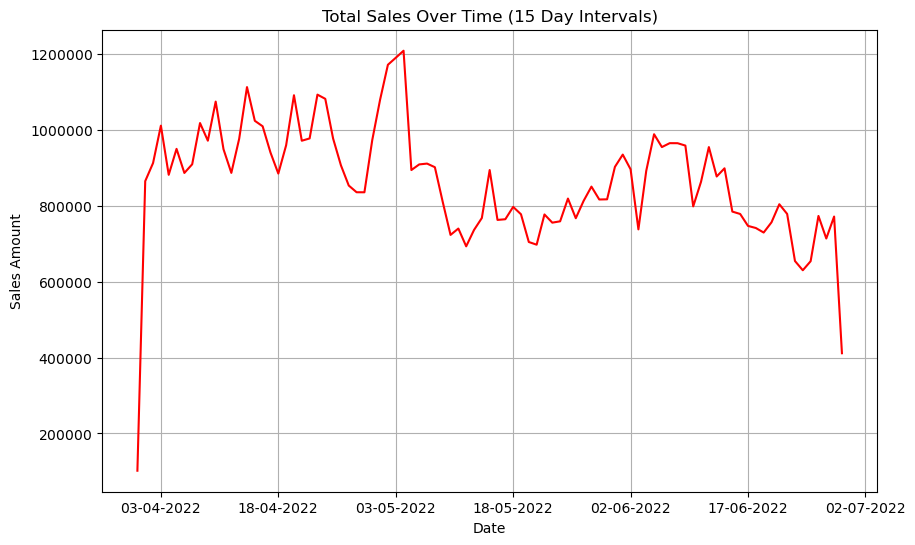

In [11]:
# Grouping by date and adding the 'Amount'
sales_over_time = df.groupby('Date')['Amount'].sum().reset_index()

# Line Chart Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sales_over_time['Date'], sales_over_time['Amount'],color='red')  

# Creating 15-day interval for x-axis labels (Per day intervals mashes the Dates)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
#Formatting Dates to DD MM YYYY
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) 

# Adding Title, labels, and grid
plt.title('Total Sales Over Time (15 Day Intervals)')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True) # For better understanding

# Used Scaler Formatter to Format Scales on Y-axis 
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Monthly Sales Overview (Bar Chart)

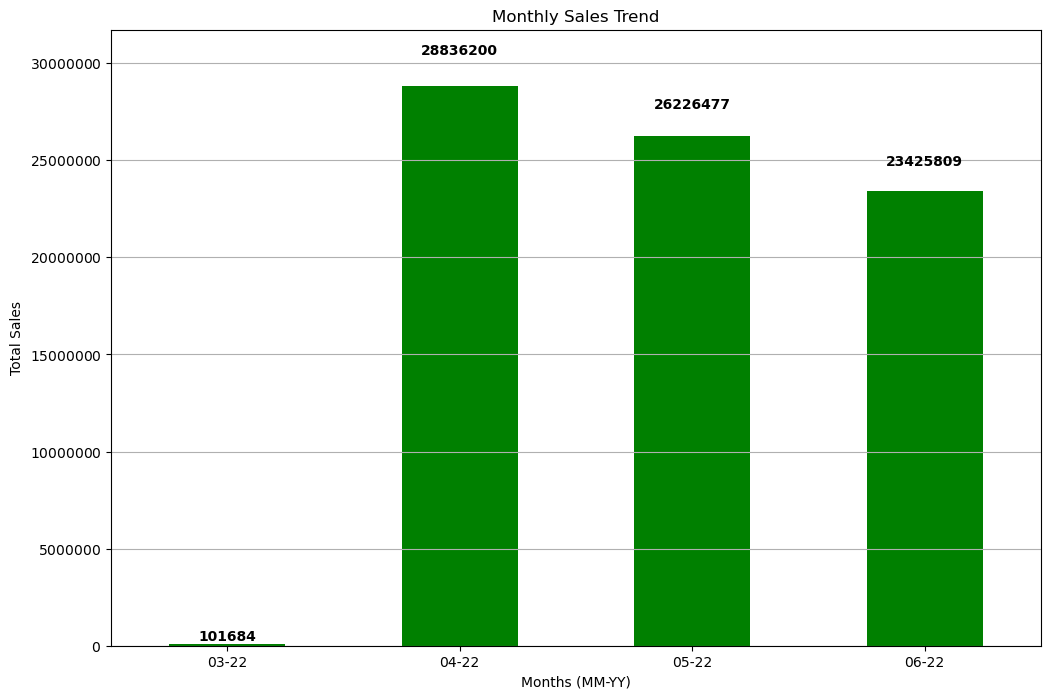

In [23]:
# Taking months from Dates
monthly_sales = df.resample('M', on ='Date')['Amount'].sum()
monthly_sales.index = monthly_sales.index.strftime('%m-%y')

# Create figure and axes for more control
fig, ax = plt.subplots(figsize=(12, 8))
monthly_sales.plot(kind='bar', color='green', ax=ax, title='Monthly Sales Trend')

# Adding labels, and grid
plt.ylabel('Total Sales')
plt.xlabel('Months (MM-YY)') 
plt.xticks(rotation=0) 
plt.grid(axis='y')

# Creating Extra Headspace for Values on bar to stay in graph 
max_sales = monthly_sales.max() * 1.1
plt.ylim(bottom=0, top=max_sales)

# Adding Values on each bar
for i, v in enumerate(monthly_sales):
    ax.text(i, v + v * 0.05, f"{v:.0f}", ha='center',va = 'bottom', fontsize=10, fontweight='bold')
# Used Scaler Formatter to Format Scales on Y-axis 
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


### Yearly Sales Overview -

In [13]:
#No Visualization Because Data only consists of a single year's data (2022)
yearly_sales = df.resample('Y', on='Date')['Amount'].sum()
yearly_sales.index =yearly_sales.index.strftime('%y')
yearly_sales

Date
22    78590170.25
Name: Amount, dtype: float64

# Conclusion
## Insights of Sales Overview
### Daily Sales Insights
#### Findings and Insights
The graph represents total daily sales with 15 days of interval in between. There appears to be a seasonal trend, with sales rising in the start of May and then slowly falling back down
There are two major Peaks:<br>
1: A summer sale in May which leads to rise in purchase of products like Air Cons, Summer Clothing and other seasonal products.<br>
2: The second comes around end of June which represents that there might have been an end of season sale or Monsoon sale again
#### Recommendation
**Introduce product promotions:** If you see a seasonal trend in your sales data, try running promotions and marketing campaigns when sales are usually lower. This can help to boost sales.<br>

**Offer seasonal products:** Sell products that are more popular in certain times of year. You can offer discounts on these products during the off-season.
### Montly Sales Insights
#### Findings and Insights
The bar graph represents sales made in every months. It Appears that during March had less sales because the data satrt from very late in March<br>
The Bar in April went quite high, This might have happened because of the summer holidays, people started buying new stuff (Clothes)
#### Recommendation
**Stay Stocked up**: During this time (April-June)there might be unexpected hike in sales, so keep stocks full.<br>
**Try to Experiment with Seasonal Products**:Try Adding more seasonal items to inventory (Example- for Summer add sunscreen etc.)